In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 학습 데이터를 읽는다. skiprows=1: 첫번째행 skip
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]  # 모든행의  첫번째 열
train_y = train[:,1]  # 모든행의  두번째 열

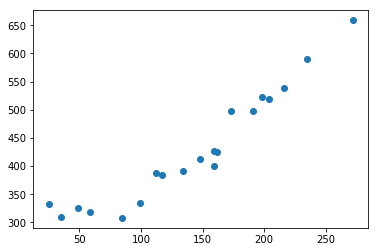

In [3]:
plt.plot(train_x, train_y, 'o')
plt.show()

In [4]:
# 표준화: 평균 0, 분산 1
mu = train_x.mean()    # 모평균(평균)
sigma = train_x.std()  # 표준편차

def standardize(x):
    return (x - mu) / sigma

In [5]:
train_z = standardize(train_x)
train_z

array([ 1.39433428,  1.11069026,  0.09554325, -1.59139223, -0.8449606 ,
        0.93154667, -1.38239138, -1.74067856,  0.46875906,  0.73747445,
       -0.11345761, -0.63595975, -0.36724436, -0.44188752,  0.3045441 ,
        1.94669369,  0.25975821,  0.25975821, -1.23310505,  0.84197488])

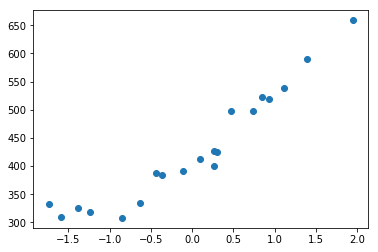

In [6]:
plt.plot(train_z, train_y, 'o')
plt.show()

In [7]:
# 매개변수를 초기화한다. 학습 하기전에 정답을 모름으로 대충 난수로 결정함.
a = np.random.rand()  # 기울기
print(a)
b = np.random.rand()  # 편향
print(b)


0.6789308412823407
0.6881815944242136


In [8]:
# 예측함수: y = ax +b
def f(x):
    return a * x + b

In [9]:
# 목적함수: 손실 함수, 0.5 손실값을 작은 값으로 처리, 손실값은 감소를 목적으로 함.
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [10]:
# 학습률
ETA = 0.001
ETA

0.001

In [11]:
# 오차의 차분
diff = 1

In [12]:
# 갱신 횟수
count = 0

In [13]:
error = E(train_z, train_y) # 난수를 가지고 특별한 계산없이 오차 확인
print('error: ', error)

error:  1931456.8704140745


In [14]:
# 표준화된 값에서 실제값을 뺀후 합을 구함. 
print('np.sum((f(train_z) - train_y)): ', np.sum((f(train_z) - train_y)))
print('np.sum((f(train_z) - train_y) * train_z: ', np.sum((f(train_z) - train_y) * train_z))

np.sum((f(train_z) - train_y)):  -8569.236368111517
np.sum((f(train_z) - train_y) * train_z:  -1855.9967415811811


In [15]:
# 연속 실행하면 기존 값의 영향을 받음으로 처음 부터 실행 할것
# 오차의 차분이 0.01이하가 될 때까지 매개변수 갱신을 반복한다
while diff > 0.01:
    # 갱신 결과를 임시변수에 저장한다.
    # 편미분의 사용
    tmp_b = b - ETA * np.sum((f(train_z) - train_y)) # 편향
    tmp_a = a - ETA * np.sum((f(train_z) - train_y) * train_z)  # 기울기

    # 매개변수를 갱신한다
    b = tmp_b  # 편향
    a = tmp_a  # 기울기

    # 이전 회의 오차와의 차분을 계산한다
    current_error = E(train_z, train_y)
    diff = error - current_error  # 오차 계산
    error = current_error

    # 로그를 출력한다
    count += 1
    log = '{}회째: 편향b = {:.3f}, 기울기 a = {:.3f}, 차분 = {:.4f}'
    print(log.format(count, b, a, diff))

1회째: 편향b = 9.257, 기울기 a = 2.535, 차분 = 76107.7705
2회째: 편향b = 17.655, 기울기 a = 4.354, 차분 = 73093.9028
3회째: 편향b = 25.885, 기울기 a = 6.136, 차분 = 70199.3842
4회째: 편향b = 33.950, 기울기 a = 7.883, 차분 = 67419.4886
5회째: 편향b = 41.854, 기울기 a = 9.595, 차분 = 64749.6769
6회째: 편향b = 49.600, 기울기 a = 11.273, 차분 = 62185.5897
7회째: 편향b = 57.191, 기울기 a = 12.917, 차분 = 59723.0403
8회째: 편향b = 64.631, 기울기 a = 14.528, 차분 = 57358.0079
9회째: 편향b = 71.921, 기울기 a = 16.107, 차분 = 55086.6308
10회째: 편향b = 79.065, 기울기 a = 17.655, 차분 = 52905.2002
11회째: 편향b = 86.067, 기울기 a = 19.171, 차분 = 50810.1543
12회째: 편향b = 92.929, 기울기 a = 20.657, 차분 = 48798.0722
13회째: 편향b = 99.653, 기울기 a = 22.114, 차분 = 46865.6685
14회째: 편향b = 106.243, 기울기 a = 23.541, 차분 = 45009.7880
15회째: 편향b = 112.701, 기울기 a = 24.940, 차분 = 43227.4004
16회째: 편향b = 119.030, 기울기 a = 26.310, 차분 = 41515.5954
17회째: 편향b = 125.233, 기울기 a = 27.654, 차분 = 39871.5778
18회째: 편향b = 131.311, 기울기 a = 28.970, 차분 = 38292.6633
19회째: 편향b = 137.268, 기울기 a = 30.260, 차분 = 36776.2739
20회째: 편향b = 143.105, 

In [16]:
print('f(x) =',a, '*x', '+', b)

f(x) = 93.44636224798975 *x + 429.0003812750166


In [17]:
x = np.linspace(-3, 3, 100) # -3 ~ 3까지 100개의 구간으로 분할
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

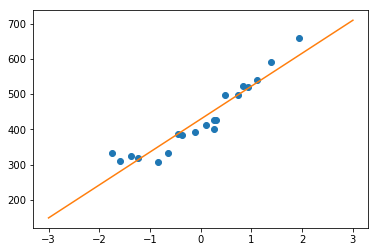

In [18]:
# 그래프로 나타낸다
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o') # 기존에 발생된 데이터, csv 파일 내용
plt.plot(x, f(x))  # x값에 대한 y값을 예측하여 출력
plt.show()


In [19]:
# 검증
f(standardize(100))  # 100 만원 사용시 370회 클릭

370.9672826999425

In [20]:
f(standardize(200))  # 200 만원 사용시 510회 클릭

510.4699235054091

In [21]:
f(standardize(300))  # 300 만원 사용시 649회 클릭

649.9725643108757

In [22]:
f(standardize(173))  # 498

472.8042104879331